In [6]:
# 환율 = pd.read_csv('어쩌면최종데이터.csv')

# # ✅ 결측값 개수 및 비율 계산
# null_df = pd.DataFrame({
#     '결측값 개수': 환율.isnull().sum(),
#     '결측 비율 (%)': 환율.isnull().mean() * 100
# })

# # ✅ 'alpha'가 컬럼명에 포함된 것 중에서만 결측 비율 5% 이상인 컬럼 필터링
# alpha_cols = [col for col in 환율.columns if 'alpha' in col]
# alpha_null_df = null_df.loc[alpha_cols]
# drop_cols = alpha_null_df[alpha_null_df['결측 비율 (%)'] >= 5].index.tolist()

# # ✅ 해당 alpha 컬럼들만 삭제
# 환율 = 환율.drop(columns=drop_cols)

# # ✅ 남은 결측값 전체 삭제 (단, alpha 외 컬럼 포함)
# 환율 = 환율.dropna()

# 환율 = 환율.sort_values(by='Date').reset_index(drop=True)
# print('완료')

완료


# 데이터 준비

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('df_2021_to_2025.csv')
df.shape

(5325676, 20)

In [52]:
df['일자']

0          20210106
1          20210106
2          20210106
3          20210106
4          20210106
             ...   
5325671    20250723
5325672    20250723
5325673    20250723
5325674    20250723
5325675    20250723
Name: 일자, Length: 5325676, dtype: int64

In [53]:
print('수집한 데이터는 약', int(df.shape[0]/10000), '만 건입니다')

수집한 데이터는 약 532 만 건입니다


# EPU에 포함되는 것만 필터링

In [5]:
# 1) 경제(E): 거시경기·실물경제를 직접 지칭
e = [
    "경제", "경기"
]

# 2) 정책(P): 정부·의회·당국 및 모든 정책·제도·규제·조치
p = [
    # ─ 기본 정책 키워드 ─
    "정부", "청와대", "국무회의", "국회", "의회", "당국",
    "한국은행", "한은", "중앙은행",
    "기획재정부", "기재부", "금융위원회", "금융위",
    "정책", "재정", "입법", "법안", "법률", "예산",
    "세금", "규제", "규정", "적자", "부채", "채무",
    "연방준비제도", "연준", "Fed", "FRB",
    "구조개혁", "구조조정",

    # ─ 통화·금융 정책 ─
    "통화정책", "금융완화", "추가완화", "양적완화", "질적완화",
    "통화긴축", "유동성긴축", "마이너스 금리", "통화할인율", "재할인율",
    "통화 운용", "공개시장조작", "물가안정목표", "물가목표",
    "금융통화위원회", "금통위", "금융통화운영위원회", "금융통의",
    "기준금리", "정책금리", "금리정책", "통화당국", "환금리",

    # ─ 재정 정책 ─
    "재정정책", "정부 예산", "추가경정예산", "추경", "일반 회계", "특별 회계",
    "재정적자", "재정수지", "정부지출", "재정지출",
    "사회보장성 지출", "국민연금 보험료", "국민건강 보험료",
    "의료비 지출", "간병비 지출", "의료보수수가", "의료수가",
    "공무원급여", "공적개발원조", "ODA",
    "국방비", "군비",
    "국채 발행 잔여", "공공부문 부채", "재정부채", "국채", "정부부채", "지방채",
    "경기부양", "경기부양책",

    # ─ 무역·통상 정책 ─
    "통상문제", "무역문제", "비관세장벽", "수입제한",
    "포괄통상법", "종합무역법",
    "무역정책", "통상정책", "무역협상",
    "세계무역기구", "WTO",
    "관세 및 무역에 관한 일반협정", "GATT", "가트",
    "관세 인하", "무역자유화", "수입자유화", "시장접근",
    "무역협정", "통상협정",
    "환태평양경제동반자협정", "TPP",
    "경제동반자협정", "경제파트너협정", "경제 파트너십 협정", "EPA",
    "자유무역협정", "FTA",
    "무역분쟁", "관세", "우루과이라운드", "도하라운드", "덤핑",

    # ─ 환율 정책 ─
    "외환정책", "환율정책", "시장개입", "외환시장 개입", "외환당국 개입",
    "미세조정", "환율 안정책", "환율 안정 조치", "환율 변동성 완화",
    "환율 조작", "외환보유고", "외환보유액", "달러매도", "원화 매입 개입"
]

# 3) 불확실(U): 모호성·위험·걱정·우려를 표현
u = [
    "불확실", "불확실성", "리스크", "불투명",
    "불안", "우려", "걱정"
]


In [6]:
import re

cols = ['키워드', '특성추출(가중치순 상위 50개)', '본문', '제목']          # 검색 대상 열
joined = df[cols].fillna('').agg(' '.join, axis=1)                          # 네 열을 하나로 합침

cond1 = joined.str.contains('|'.join(map(re.escape, e)))                    # 경제·경기
cond2 = joined.str.contains('|'.join(map(re.escape, p)))                    # 불확실 관련
cond3 = joined.str.contains('|'.join(map(re.escape, u)))                    # 정책(정부 등)
                 # 정책(정부 등)

# 세 조건을 모두 만족하는 기사만 추리기
df = df[cond1&cond2&cond3]

In [7]:
print('사용할 데이터는 약', int(df.shape[0]/10000), '만 건입니다')

사용할 데이터는 약 16 만 건입니다


# 월별 토픽 모델링(제목)

In [35]:
df2 = df[['일자','키워드','언론사']]

df2['일자'] = pd.to_datetime(df2['일자'], format='%Y%m%d')
df2['연'] = df2['일자'].dt.year
df2['월'] = df2['일자'].dt.month
df2 = df2[df2['연'] >= 2023]
df2.shape

C:\Users\samsung\AppData\Local\Temp\ipykernel_13724\1362219350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['일자'] = pd.to_datetime(df2['일자'], format='%Y%m%d')
C:\Users\samsung\AppData\Local\Temp\ipykernel_13724\1362219350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연'] = df2['일자'].dt.year
C:\Users\samsung\AppData\Local\Temp\ipykernel_13724\1362219350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

(91319, 5)

In [36]:
df2.columns

Index(['일자', '키워드', '언론사', '연', '월'], dtype='object')

In [37]:
df2['언론사'].value_counts()

언론사
서울경제    12240
매일경제    11470
한국경제    11061
세계일보     9121
중앙일보     8574
경향신문     7488
서울신문     5977
동아일보     5499
한겨레      5104
국민일보     5094
문화일보     4852
조선일보     4839
Name: count, dtype: int64

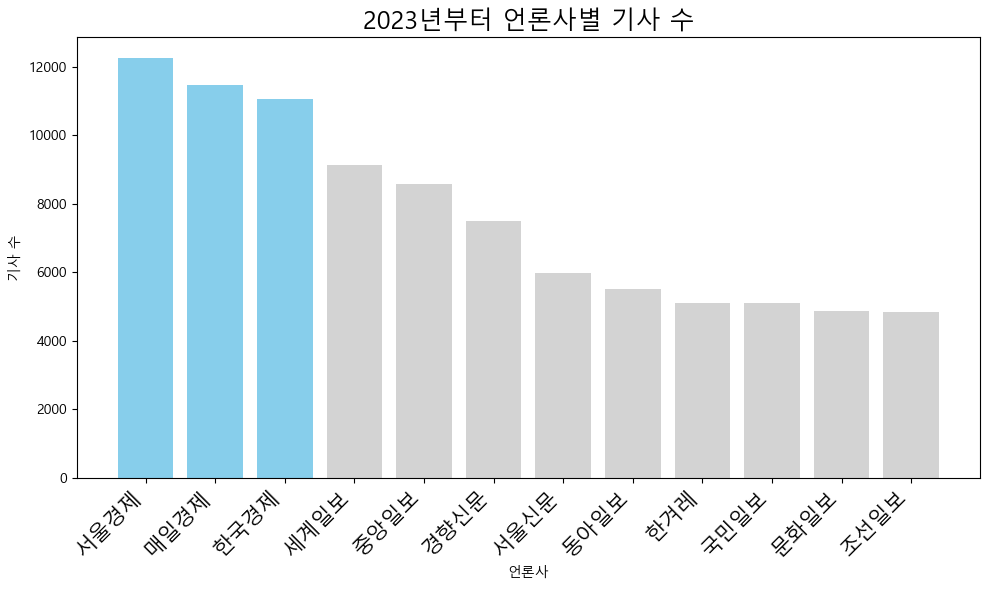

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
# 언론사별 기사 수 집계
counts = df2['언론사'].value_counts()

# 색상 리스트 생성 (상위 3개는 초록색 계열, 나머지는 회색)
colors = ['skyblue', 'skyblue', 'skyblue'] + ['lightgray'] * (len(counts) - 3)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

# 제목/레이블
plt.title('2023년부터 언론사별 기사 수', fontsize=18)
plt.xlabel('언론사')
plt.ylabel('기사 수')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.tight_layout()
plt.show()

# 상위언론사 전체데이터 토픽모델링

In [54]:
상위언론사데이터 = df[df['언론사'].str.contains('서울경제|매일경제|한국경제')][['일자','키워드','언론사','제목']]

상위언론사데이터['일자'] = pd.to_datetime(상위언론사데이터['일자'], format='%Y%m%d')
상위언론사데이터['연'] = 상위언론사데이터['일자'].dt.year
상위언론사데이터['월'] = 상위언론사데이터['일자'].dt.month
상위언론사데이터 = 상위언론사데이터[상위언론사데이터['연'] >= 2023]
상위언론사데이터.shape

(1155817, 6)

In [55]:
상위언론사데이터.columns

Index(['일자', '키워드', '언론사', '제목', '연', '월'], dtype='object')

In [56]:
상위언론사데이터

,일자,키워드,언론사,제목,연,월
2355196,2023-01-05,"고려대장경,전산,기여,허인섭,별세,CD,제작,제작,주도,역할,고려대장경,팔만대장경,...",서울경제,'고려대장경 전산화에 기여' 허인섭 별세,2023,1
2355197,2023-01-05,"아시아나항공,국내선,비즈니스,클래스,재개,탑승객,높여,국내항공,1위,아시아나항공,한...",서울경제,"[2022년 고객만족도 조사] 아시아나항공, 국내선 비즈니스 클래스 재개 탑승객 편...",2023,1
2355202,2023-01-05,"15년,투입,공급과잉,청산,기사,11:13,마켓,사이트,게재,기사,KCC,야심,폴리...",한국경제,[KCC 폴리실리콘 잔혹사]15년간 1조 투입했지만 공급과잉 못이기고 청산,2023,1
2355203,2023-01-05,"2400억,사우디,우발,채무,국제중재,기사,11:31,마켓,인사이트,게재,기사,KC...",한국경제,[KCC 폴리실리콘 잔혹사] 사우디 우발채무 2400억 국제중재 휘말려,2023,1
2355204,2023-01-05,"IMM,PE,에어퍼스트,소수,지분,매각,기사,09:06,마켓,인사이트,게재,기사,사...",한국경제,"IMM PE, 에어퍼스트 소수지분 매각 본격화",2023,1
...,...,...,...,...,...,...
5325587,2025-07-23,"톱10,유럽,상금,최혜진,김효주,유럽,장타,윤이나,ISPS,오픈,스코틀랜드,여자,미...",서울경제,유럽 '상금 톱10' 만난 최혜진 김효주 유럽 '장타 톱10' 만난 윤이나,2025,7
5325594,2025-07-23,"공포,공황,장애,예기,거대,공포,연예인,심리,부담,취약,증상,공황장애,위험,자체,공...",매일경제,[Issue Pick] 숨이 막혀 죽을 것 같은 공포의 10분 ‘공황장애’,2025,7
5325595,2025-07-23,"한미,통상,협의,국익,수호,동맹,강화,초점,한미,관세,협상,시한,8월,1일,부총리,...",서울경제,"[사설] 한미 ‘2+2’ 통상 협의, 국익 수호 동맹 강화에 초점 맞춰야",2025,7
5325596,2025-07-23,"단통법,폐지,공짜폰,경쟁,AI,전환,통신,산업,대표,규제,이동,통신,단말,장치,유통...",서울경제,"[사설] 단통법 11년만에 폐지, 공짜폰 경쟁 접고 AI 전환 속도 낼 때다",2025,7


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# 1. 전처리: 키워드가 문자열이면 리스트로 변환
상위언론사데이터 = 상위언론사데이터.copy()
상위언론사데이터['키워드'] = 상위언론사데이터['키워드'].apply(
    lambda x: x if isinstance(x, list) else str(x).replace('...', '').split(',')
)

# 2. 키워드 문장화
상위언론사데이터['키워드문장'] = 상위언론사데이터['키워드'].apply(lambda x: ' '.join(x))

# 3. LDA 함수 정의
def lda_by_month(df, n_topics=5, top_n=10):
    result = []

    for (year, month), group in df.groupby(['연', '월']):
        texts = group['키워드문장'].tolist()

        if len(texts) < 2:
            continue  # 문서 수 너무 적으면 스킵

        vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
        try:
            X = vectorizer.fit_transform(texts)
        except ValueError:
            continue  # 단어 없음 → 스킵

        if X.shape[1] == 0:
            continue  # 유효 단어 없음 → 스킵

        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)
        words = vectorizer.get_feature_names_out()

        for idx, topic in enumerate(lda.components_):
            top_keywords = [words[i] for i in topic.argsort()[:-top_n - 1:-1]]
            result.append({
                '연': year,
                '월': month,
                '토픽번호': idx + 1,
                '상위키워드': ', '.join(top_keywords)
            })

    return pd.DataFrame(result)

# 4. 실행
monthly_topics = lda_by_month(상위언론사데이터, n_topics=3, top_n=10)
print(monthly_topics)

       연  월  토픽번호                                      상위키워드
0   2023  1     1    정부, 중국, 대통령, 금리, 미국, 시장, 대표, 경제, 조사, 이날
1   2023  1     2     공개, 의원, 사람, 생각, 방송, 모습, 자신, 영화, 배우, 서울
2   2023  1     3   기업, 시장, 사업, 투자, 서비스, 글로벌, 미국, 제품, 대표, 매출
3   2023  2     1     지원, sm, 공개, 혐의, 서울, a씨, 경찰, 진행, 사업, 교육
4   2023  2     2  서울, 아파트, 주택, 브랜드, 진행, 가구, 사람, 가격, 부동산, 시작
..   ... ..   ...                                        ...
88  2025  6     2   대통령, 정부, 국민, 이재명, 의원, 후보, 이날, 대표, 지원, 정책
89  2025  6     3  서울, 사업, 지역, 진행, 예정, 제공, 서비스, 아파트, 운영, 브랜드
90  2025  7     1     시장, 대비, 투자, 기준, 증가, 고객, 피해, 상품, 지역, 발생
91  2025  7     2   대통령, 의원, 국민, 후보자, 이날, 공개, 사람, 대표, 생각, 장관
92  2025  7     3   ai, 미국, 기업, 시장, 사업, 정부, 관세, 트럼프, 중국, 글로벌

[93 rows x 4 columns]


In [64]:
monthly_topics['일자'] = pd.to_datetime(monthly_topics['연'].astype(str) + '-' + monthly_topics['월'].astype(str) + '-01', format='%Y-%m-%d')

In [68]:
monthly_topics[['일자','토픽번호','상위키워드']].to_csv('토픽모델링.csv', index=False)